# Compute Statistics from Card Draws

In [1]:
import numpy as np
import pandas as pd
from enum import Enum
import matplotlib
import matplotlib.pyplot as plt

# Source: https://docs.python.org/3.4/library/enum.html#orderedenum
# https://github.com/hale/udacity-descriptive-statistics-project/blob/master/

class OrderedEnum(Enum):
    def __ge__(self, other):
        if self.__class__ is other.__class__:
            return self.value >= other.value
        return NotImplemented
    def __gt__(self, other):
        if self.__class__ is other.__class__:
            return self.value > other.value
        return NotImplemented
    def __le__(self, other):
        if self.__class__ is other.__class__:
            return self.value <= other.value
        return NotImplemented
    def __lt__(self, other):
        if self.__class__ is other.__class__:
            return self.value < other.value
        return NotImplemented

class Rank(OrderedEnum):
    ace = 1
    two = 2
    three = 3
    four = 4
    five = 5
    six = 6
    seven = 7
    eight = 8
    nine = 9
    ten = 10
    jack = 11
    queen = 12
    king = 13
    
    @property
    def score(self):
        if (self.value <= 10):
            return self.value
        else:
            return 10
        
Suit = OrderedEnum("Suit", "heart diamond club spade")

class Card(object):
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
        
    def __str__(self):
        return "{} of {}s".format(self.rank.name.capitalize(), self.suit.name.capitalize())
    
    def __repr__(self):
        return "{} of {}s".format(self.rank.name.capitalize(), self.suit.name.capitalize())
    
    def __value__(self):
        return self.rank.score()

class Deck(object):
    def __init__(self):
        self.cards = []
        for suit in Suit:
            for rank in Rank:
                card = Card(rank, suit)
                self.cards.append(card)
                
print(Deck().cards)

[Ace of Hearts, Two of Hearts, Three of Hearts, Four of Hearts, Five of Hearts, Six of Hearts, Seven of Hearts, Eight of Hearts, Nine of Hearts, Ten of Hearts, Jack of Hearts, Queen of Hearts, King of Hearts, Ace of Diamonds, Two of Diamonds, Three of Diamonds, Four of Diamonds, Five of Diamonds, Six of Diamonds, Seven of Diamonds, Eight of Diamonds, Nine of Diamonds, Ten of Diamonds, Jack of Diamonds, Queen of Diamonds, King of Diamonds, Ace of Clubs, Two of Clubs, Three of Clubs, Four of Clubs, Five of Clubs, Six of Clubs, Seven of Clubs, Eight of Clubs, Nine of Clubs, Ten of Clubs, Jack of Clubs, Queen of Clubs, King of Clubs, Ace of Spades, Two of Spades, Three of Spades, Four of Spades, Five of Spades, Six of Spades, Seven of Spades, Eight of Spades, Nine of Spades, Ten of Spades, Jack of Spades, Queen of Spades, King of Spades]


In [2]:
df = pd.DataFrame({'card': Deck().cards})
df['suit'] = df.card.map(lambda c: c.suit)
df['rank'] = df.card.map(lambda c: c.rank)
df['score'] = df.card.map(lambda c: c.rank.score)
df.tail()

,card,suit,rank,score
47,Nine of Spades,Suit.spade,Rank.nine,9
48,Ten of Spades,Suit.spade,Rank.ten,10
49,Jack of Spades,Suit.spade,Rank.jack,10
50,Queen of Spades,Suit.spade,Rank.queen,10
51,King of Spades,Suit.spade,Rank.king,10


## Distribution of Card Values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e561160>]], dtype=object)

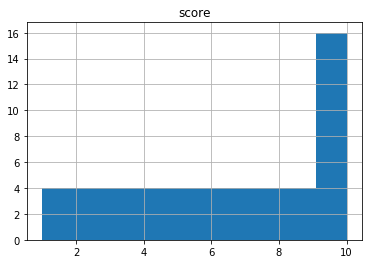

In [3]:
# Create a histogram representing the relative frequencies of the card values from a single draw.
%matplotlib inline
df.hist()

* What is the mean of the card values for a single draw?
* What is the median of the card values for a single draw?
* What is the standard deviation of the card values for a single draw? (population sd)

In [4]:
print(df.describe())
print()
print(df.median())
print()
print(df.std(ddof=0))

           score
count  52.000000
mean    6.538462
std     3.183669
min     1.000000
25%     4.000000
50%     7.000000
75%    10.000000
max    10.000000

score    7.0
dtype: float64

score    3.152908
dtype: float64


## Get Samples from the Deck of Cards

To obtain a single sample, shuffle your deck of cards and draw three cards from it. (You will be sampling from the deck without replacement.) Record the cards that you have drawn and the sum of the three cards’ values. Repeat this sampling procedure a total of at least thirty times.

In [5]:
def get_sample(n = 3):
    return df.reindex(np.random.permutation(df.index)).head(n)

get_sample()

,card,suit,rank,score
33,Eight of Clubs,Suit.club,Rank.eight,8
10,Jack of Hearts,Suit.heart,Rank.jack,10
13,Ace of Diamonds,Suit.diamond,Rank.ace,1


In [6]:
samples = []
for _ in range(10000):
    samples.append(get_sample()['score'].sum())

samples = pd.Series(samples)

## Distribution of Values

In [7]:
samples.describe()

count    10000.000000
mean        19.575800
std          5.358538
min          3.000000
25%         16.000000
50%         20.000000
75%         23.000000
max         30.000000
dtype: float64

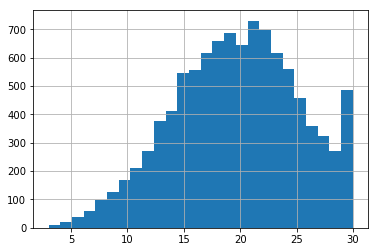

In [8]:
samples.hist(bins = 26)

The distribution of sample values is normal. This is because the distribution of sample means (or in this case, sums) is normal for any population. This is given by The Central Limit Theorem.

* What range of values do you expect 90% of three-card draw sums to fall into?

90% of the draw values should fall within the 5th and 95th percentile. The z-scores that correspond to these percentiles are -1.645 and 1.645, respectively. For our estimated mean of 19.54 and our estimated standard deviation of 5.39, these z-scores correspond to:

* z = (x - sample_mean) / SE => -1.645 = (x - 19.54) / 5.39 => x = 10.67
* z = (x - sample_mean) / SE => 1.645 = (x - 19.54) / 5.39 => x = 28.41

Therefore, we expect approximately 90% of the draw values to fall in the range (10.67, 28.41).

* How likely are you to get a draw of at least 20 from a random draw?

Using our estimated mean and standard deviation, 20 corresponds to a z-score of:

* z = (x - sample_mean) / SE => z = (20 - 19.54) / 5.39 => z = 0.085

Using this, we find that the probability that the draw value will be less than 20 is 0.534. Therefore, the probability that the draw value will be at least 20 is 0.466.